# Predictive Maintenance Example Use Case

Wir benötigen in einem ersten Schritt zwei Komponenten:

* *Eine Maschine* (M1) die wir überwachen können
* *Ein Machine Learning Modell* (MLM) das bewertet, ob die Maschine gut oder schlecht läuft

Die Maschine M1 weist einen integrierten Sensor, der alle 1/10 Sekunden einen Wert ausgibt. Der Sensor liefert Werte $v_i \in R, 0 < v_i < 2 $ wobei Werte $v_i \leq .5$ als "normal" gelten, Werte $v_i > .5$ als "anormal" sollen. 

# Aufgaben

1. Plotte die Verteilung für jede Maschinen-Konfiguration (Werte-Regimes) wie unten aufgeführt (working ok, fail more often, constantly failing)
2. Schaue Dir die unterschiedlichen Verteilung nach Konfiguration an (was siehst Du?)
3. Beschreibe wie wir Ausreisser mit einem ML Algorithmus oder mit einem statistischen Verfahren erkennen können
4. Implementiere ein einfaches ML Modell das aus den "Sensor-Daten" Ausreisser erkennt

References:

* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
* https://scikit-learn.org/stable/modules/outlier_detection.html


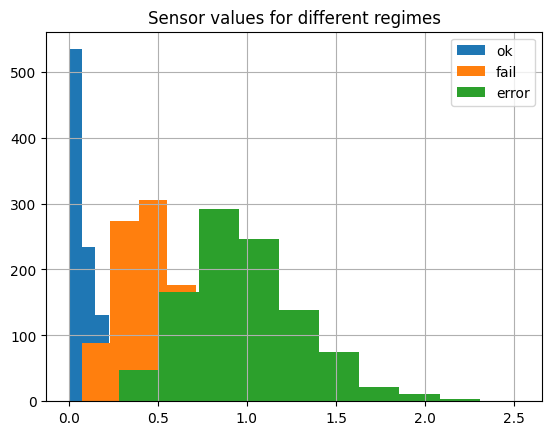

In [4]:
# generates example "sensor" values with outliers
# we use a gamma distribution to generate mostly "good" data, and a few "bad" outliers to signal failure
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

rnd = np.random.default_rng()

# Different machine configurations

REGIMES = {
     # Configuration 1: working ok, rare failure
    'ok': (1., .1),
    # Configuration 2: fail often
    'fail': (5., .1),
    # Configuration 3: constantly failing
    'error': (10., .1),
}

for r in REGIMES:
    size = 1000
    shape, scale = REGIMES[r]
    data = rnd.gamma(shape, scale, size)
    # plot distribution
    df = pd.Series(data)
    df.hist(bins=10)
    df.to_csv(f'datasets/sensor_{r}.csv', index=False, header=['value'])
plt.title(f'Sensor values for different regimes')
plt.legend(REGIMES.keys())

# How can we detect anomalies? 

* Using statistical methods?
* Why use a machine learning model?

## Train a machine learning model

* Here is a working example using an IsolationForest


 1    0.991
-1    0.009
Name: proportion, dtype: float64

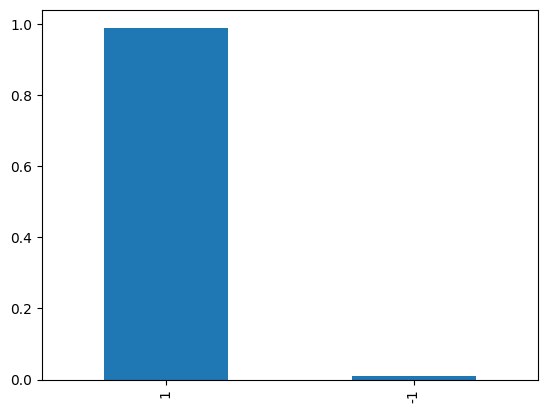

In [9]:
# use an isolation forest
from sklearn.ensemble import IsolationForest

df_train = pd.read_csv('datasets/sensor_ok.csv')
clf = IsolationForest(contamination=.01)

y_test = clf.fit_predict(df_train.values.reshape(-1, 1))
counts = pd.Series(y_test).value_counts(normalize=True)
counts.plot(kind='bar')
counts

 1    0.996
-1    0.004
Name: proportion, dtype: float64

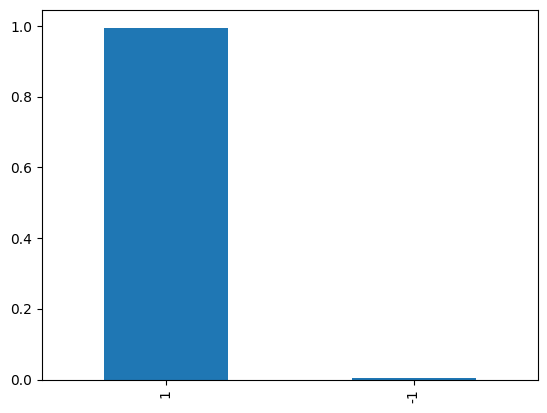

In [19]:
# test the model performance
test_data = rnd.gamma(shape, scale, size)

predictions = clf.predict(test_data.reshape((-1, 1)))
counts = pd.Series(predictions).value_counts(normalize=True)
counts.plot(kind='bar')
counts

-1    0.963
 1    0.037
Name: proportion, dtype: float64

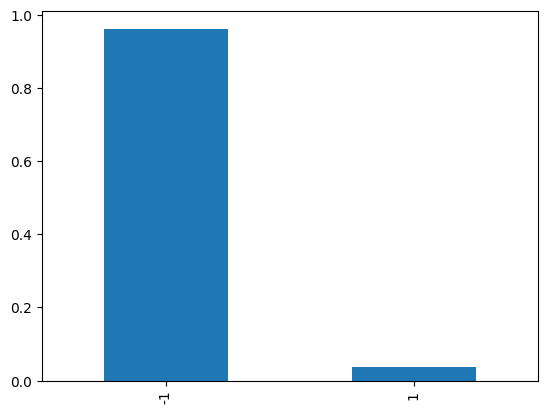

In [20]:
# test the model performance
shape, scale = 10., .1 
test_data = rnd.gamma(shape, scale, size)

predictions = clf.predict(test_data.reshape((-1, 1)))
counts = pd.Series(predictions).value_counts(normalize=True)
counts.plot(kind='bar')
counts

In [8]:
# Let's save the model and the training data for later use
from util import save_model

!mkdir -p datasets models

pd.DataFrame({'value': df_train}).to_csv('datasets/traindata.csv', index=False)
save_model(clf, 'models/mymodel')